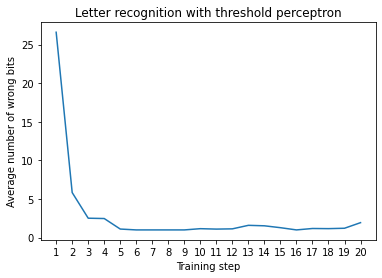

In [118]:
# Letter recognition with threshold perceptron

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

nIn=12*13
nOut=26 # number of input and output channels
wOut=np.random.random(nOut*nIn).reshape(nOut,nIn)-0.5 # random initial weight matrix

pattern = np.array([0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,1,1,1,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1])

# training vectors
rIn=np.transpose(pattern).reshape(nIn, 26) # matrix of input pattern
rDes=np.identity(26) # matrix of desired outputs
error=[]

def relu(X):
   return np.maximum(0,X)

# Updating and training network
for training_step in range(1,21):
    # test all pattern
    rOut=relu(np.matmul(wOut,rIn)) # applying the activation function
    dist=sum(sum(abs(rDes-rOut)))/26
    error.append(dist)
    # training with delta rule
    wOut=wOut+0.1*np.matmul((rDes-rOut),np.transpose(rIn))

plt.plot(range(1,21),error)
plt.xlabel('Training step')
plt.ylabel('Average number of wrong bits')
plt.title("Letter recognition with threshold perceptron")
plt.xticks(range(1,21))
plt.show()